# Algoritmos de Clasificación

Los algoritmos de clasificación nos permiten hacer predicciones cuando la variable objetivo es categórica. Algunos ejemplos son:

1) Clasificar un cáncer en benigno o maligno

2) Identificar si en una imagen aparece un perro o no

3) Clasificación de emails en spam o no-spam

# Tipos de clasificación: 

### Binaria: Cuando la variable objetivo tiene solamente dos posibles categorías (0 ,1)

### Multi-clase: Existen más de dos categorías para la variable objetivo

# K-Nearest Neighbors (K-vecinos más próximos)

Es un tipo de algoritmo usado en aprendizaje supervisado. Un modelo se entrena con entradas y sus correspondientes categorías de salida. Dado un punto para hacer la predicción, tiene en cuenta los "K" puntos más cercanos para determinar la clasificación de la entrada.

In [1]:
#Importamos los módulos necesarios
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn import metrics

In [2]:
df = pd.read_csv('cust.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [3]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

Debemos desarrollar un modelo que nos permita predecir la variable "custcat" basándose en los datos que tenemos. Este dataframe corresponde a datos de una empresa de telecomunicaciones que divide, según las entradas, a sus clientes en 4 categorías diferentes: 1) Servicio Básico 2) E-Service 3) Servicio Plus 4) Servicio completo.

Tomaremos todas las entradas como características y la variable "custcat" como salida.

In [4]:
X = df[['region','tenure','age','marital','address','income','ed','employ','retire','gender','reside']].astype(float)
Y = df['custcat'].astype(float)

In [5]:
#Estandarizamos los datos de X ya que los rangos de las variables son muy diferentes entre ellos
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [6]:
#Separamos el set de datos en entrenamiento y testeo
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.1, random_state=1, stratify=Y)

#stratify=Y se utiliza para que el porcentaje de elementos de cada clase sea similar tanto en el set de entrenamiento
#como en el set de testeo

In [7]:
from sklearn.neighbors import KNeighborsClassifier

In [8]:
K=5
#La variable K no es siempre la misma, para cada valor de K obtendremos diferentes métricas
modelo = KNeighborsClassifier().fit(X_train,Y_train)
modelo

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [9]:
Y_pred= modelo.predict(X_test) #Hacemos la predicción

In [10]:
print("Precisión del set de entrenamiento: ", metrics.accuracy_score(Y_train, modelo.predict(X_train)))
print("Precisión del set de testeo: ", metrics.accuracy_score(Y_test, Y_pred))

Precisión del set de entrenamiento:  0.55
Precisión del set de testeo:  0.29


Podemos escoger diferentes valores de K en un rango y ver cuál tiene mayor precisión:

In [17]:
diferentes_k = 20
mean = np.zeros((diferentes_k-1))
std = np.zeros((diferentes_k-1))
ConfustionMatx = [];
for n in range(1,diferentes_k):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,Y_train)
    Y_pred=neigh.predict(X_test)
    mean[n-1] = metrics.accuracy_score(Y_test, Y_pred)
    std[n-1]=np.std(Y_pred==Y_test)/np.sqrt(Y_pred.shape[0])


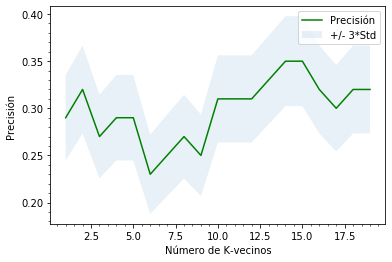

In [21]:
plt.plot(range(1,diferentes_k),mean,'g',label='Precisión')
plt.fill_between(range(1,diferentes_k),mean - 1 * std,mean + 1 * std, alpha=0.10,label='+/- 3*Std')
plt.minorticks_on()
plt.legend()
plt.ylabel('Precisión ')
plt.xlabel('Número de K-vecinos')
plt.show()

# Regresión Logística

La regresión logística es un algoritmo basado en la regresión lineal. La regresión logística ajusta a una curva especial en forma de $s$ que toma la regresión lineal y transforma la estimación numérica en una probabilidad utilizando la función sigmoide:


<center>
$ℎ_\theta(𝑥) = \sigma({\theta^TX}) =  \frac {e^{(\theta_0 + \theta_1  x_1 + \theta_2  x_2 +...)}}{1 + e^{(\theta_0 + \theta_1  x_1 + \theta_2  x_2 +\cdots)}}$
</center>

In [25]:
df2 = pd.read_csv('churn.csv')
df2.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [27]:
df2.shape

(200, 28)

En esta ocasión debemos predecir la clase "churn" (0 o 1) por lo que estamos ante un caso de clasificación binaria. Vamos a convertir entonces la variable Y = [churn] en "int", a construir un set de datos de entrada y pre-procesarlos.

In [30]:
Y = df2['churn'].astype(int)
X = df2[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']].astype(float)
X = preprocessing.StandardScaler().fit(X).transform(X) #Estandarizamos los datos.

In [31]:
#Separamos en train-test
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=1, stratify=Y)

In [44]:
#Importamos el modelo de regresión logística y la matriz de confusión para posteriormente evaluar el modelo
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
LogReg = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,Y_train)
#C es el inverso del parámetro de regularización. La regularización se explica en el primer pdf de notas de mi repositorio
#Solver se utiliza para la optimización; usamos liblinear porque tenemos un set de datos no muy grande.
LogReg

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
Y_pred = LogReg.predict(X_test)
Y_pred

array([0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1])

In [38]:
#Usamos predict_proba para tener las probabilidades en lugar de la predicción final
Y_pred_prob = LogReg.predict_proba(X_test)
#Y_pred_prob   #Columna 1 es para la clase Y=1 y la segunda columna es para Y=0

In [50]:
%matplotlib inline
#Vamos a crear la matriz de confusión; no es totalmente necesario hacer todo esto, simplemente es algo visual
#podemos obtener la matriz de confusión directamente utilizando el módulo importado
import itertools
def matriz_confusion(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de confusión normalizada")
    else:
        print("Matriz sin normalizar")

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Valor verdadero')
    plt.xlabel('Valor predecido')
print(confusion_matrix(Y_test, Y_pred, labels=[1,0]))

[[ 9  3]
 [ 3 25]]


Matriz sin normalizar
[[ 9  3]
 [ 3 25]]


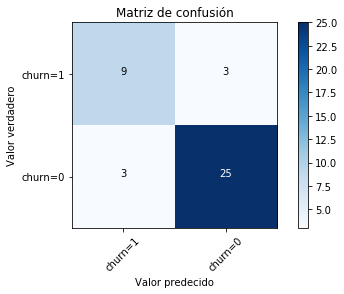

In [51]:
matriz_conf = confusion_matrix(Y_test, Y_pred, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
matriz_confusion(matriz_conf, classes=['churn=1','churn=0'],normalize= False,  title='Matriz de confusión')

## Precisión P = TP / (TP + FP)  TP == True Positive ; FP == False Positive

## Recall R = TP / (TP+FN)  FN == False Negative

## F1 == valor que nos indica, en general, cómo de buenos son nuestros valores P y R. Si está más cerca de uno implica que los valores son mejores.

In [53]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        28
           1       0.75      0.75      0.75        12

    accuracy                           0.85        40
   macro avg       0.82      0.82      0.82        40
weighted avg       0.85      0.85      0.85        40

